In [86]:
import sys
sys.path.append('../src')

import pandas as pd

from utils.preprocess import remove_footnotes, remove_punctuation, remove_stopwords_vietnamese

import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud

In [19]:
df = pd.read_csv('../data/all_wiki_data.csv')
df['label'] = df['label'].replace({
    0: "Natural Sciences",
    1: "Social Sciences",
    2: "Engineering",
    3: "Culture",
    4: "Other"
})
df.head()

,title,content,label
0,Melocalamus scandens,Melocalamus scandens là một loài thực vật có h...,Natural Sciences
1,Paleauletobius silenus,Paleauletobius silenus là một loài bọ cánh cứn...,Natural Sciences
2,Zoodes hirsutus,Zoodes hirsutus là một loài bọ cánh cứng trong...,Natural Sciences
3,Quốc kỳ Argentina,Quốc kỳ Argentina ( tiếng Tây Ban Nha : Bander...,Culture
4,Dundahera,Dundahera là một thị trấn thống kê ( census to...,Social Sciences


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    2224 non-null   object
 1   content  2224 non-null   object
 2   label    2224 non-null   object
dtypes: object(3)
memory usage: 52.2+ KB


In [21]:
df['content'] = df['content'].apply(remove_footnotes)
df['content'] = df['content'].apply(lowercase_text)
df['content'] = df['content'].apply(remove_punctuation)
df['content'] = df['content'].apply(remove_stopwords_vietnamese)
df['tokenized_words'] = df['content'].apply(tokenize)

In [22]:
df['num_words'] = df['tokenized_words'].apply(len)

In [38]:
print(df.tokenized_words[5])

['nạn', 'khan hiếm', 'nhu yếu phẩm', 'venezuela', 'tiếng', 'tây', 'ban nha', 'escasez', 'en', 'venezuela', 'tiếng', 'shortages', 'in', 'venezuela', '2016', 'hậu quả', 'sụt', 'giảm giá', 'dầu', 'hỏa', '2015', 'gián tiếp', 'quyết sách', 'kinh tế', 'tổng thống', 'hugo', 'chávez', 'kế nhiệm', 'nicolás maduro', 'lực lượng', 'chính trị', 'đối lập', 'chỉ trích', 'gay gắt', 'thói quen', 'lệ thuộc', 'ngành', 'xuất khẩu', 'dầu hỏa', 'đảng', 'cầm quyền', 'thiếu hụt', 'trầm trọng', 'mọi dụng phẩm', 'thiết yếu', 'bạo loạn', 'toàn', 'lãnh thổ', 'venezuela', 'buộc', 'nhà chức trách', 'điều động', 'quân lực', 'bảo vệ', 'chuyến', 'xe', 'chở', 'thực phẩm', 'nguy cơ', 'cướp', 'phá bỏ ngỏ', 'giới tuyến', 'đối thủ colombia', 'đáp ứng', 'nhu cầu', 'thu mua', 'hàng', 'hóa', 'dân chúng']


In [24]:
df.head(10)

,title,content,label,tokenized_words,num_words
0,Melocalamus scandens,melocalamus scandens loài thực vật hoa hòa thả...,Natural Sciences,"[melocalamus, scandens, loài, thực vật, hoa, h...",12
1,Paleauletobius silenus,paleauletobius silenus loài bọ cánh cứng rhync...,Natural Sciences,"[paleauletobius, silenus, loài, bọ cánh, cứng,...",11
2,Zoodes hirsutus,zoodes hirsutus loài bọ cánh cứng cerambycidae,Natural Sciences,"[zoodes, hirsutus, loài, bọ cánh, cứng, ceramb...",6
3,Quốc kỳ Argentina,quốc kỳ argentina tiếng tây ban nha bandera de...,Culture,"[quốc kỳ, argentina, tiếng, tây, ban nha, band...",129
4,Dundahera,dundahera thị trấn thống kê census town gurgao...,Social Sciences,"[dundahera, thị trấn, thống kê, census, town, ...",8
5,Nạn khan hiếm nhu yếu phẩm tại Venezuela,nạn khan hiếm nhu yếu phẩm venezuela tiếng tây...,Social Sciences,"[nạn, khan hiếm, nhu yếu phẩm, venezuela, tiến...",69
6,Siphocampylus imbricatus,siphocampylus imbricatus loài thực vật hoa hoa...,Natural Sciences,"[siphocampylus, imbricatus, loài, thực vật, ho...",13
7,Archidendron royenii,archidendron royenii loài thực vật hoa đậu loà...,Natural Sciences,"[archidendron, royenii, loài, thực vật, hoa, đ...",10
8,Agylla vittata,agylla vittata loài bướm đêm phân arctiinae er...,Natural Sciences,"[agylla, vittata, loài, bướm, đêm, phân arctii...",7
9,"Laurens, Hérault",laurens xã tỉnh hérault occitanie nam nước phá...,Social Sciences,"[laurens, xã, tỉnh, hérault, occitanie, nam, n...",19


In [34]:

df.drop(columns='tokenized_words').nunique()


title        2209
content      2211
label           4
num_words      96
dtype: int64

In [36]:
df['num_words'].describe()

count    2224.000000
mean       19.200540
std        17.488156
min         3.000000
25%        10.000000
50%        12.000000
75%        23.000000
max       133.000000
Name: num_words, dtype: float64

In [49]:
print(df.isna().sum())

title              0
content            0
label              0
tokenized_words    0
num_words          0
dtype: int64


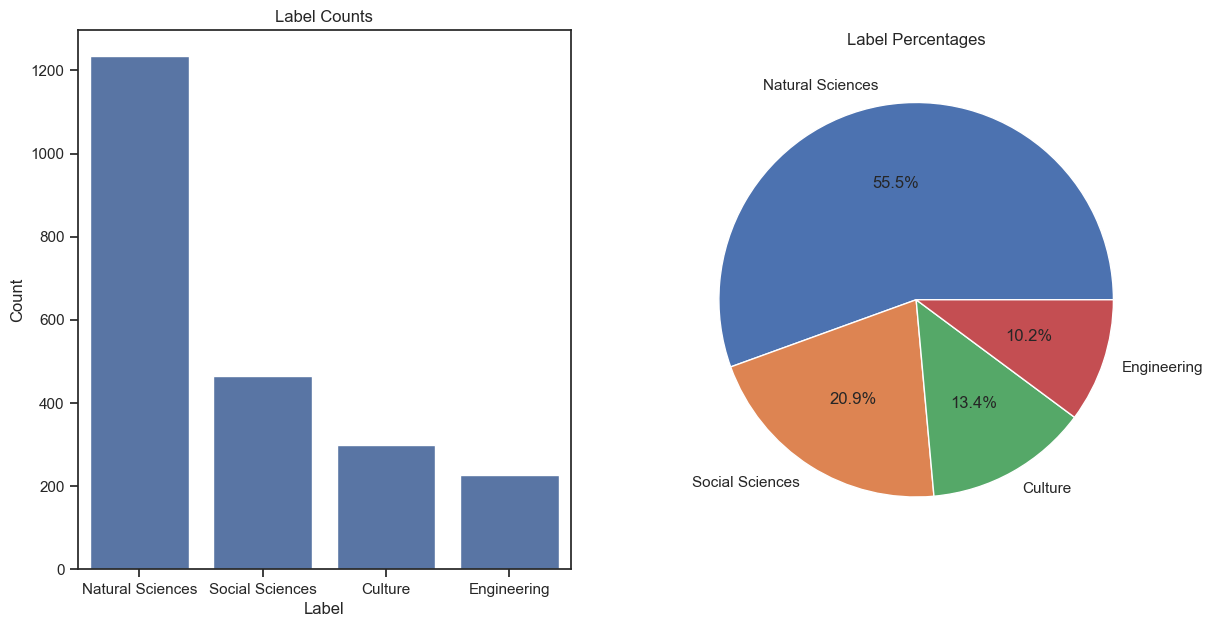

In [87]:
# Calculate label counts
label_counts = df['label'].value_counts()

# Calculate label percentages
label_percentage = df['label'].value_counts(normalize=True) * 100

fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Bar chart
sns.barplot(x=label_counts.index, y=label_counts.values, ax=axs[0], color='b')
axs[0].set_xlabel('Label')
axs[0].set_ylabel('Count')
axs[0].set_title('Label Counts')

# Pie chart
axs[1].pie(label_percentage.values, labels=label_percentage.index, autopct='%1.1f%%')
axs[1].set_title('Label Percentages')

plt.savefig(f'../img/image_1.png', bbox_inches='tight')
plt.show()



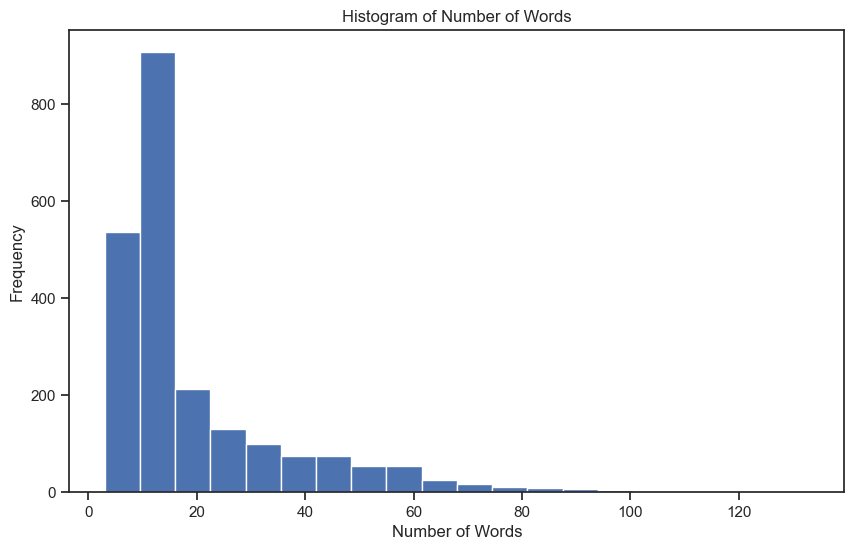

In [88]:
plt.figure(figsize=(10,6))
plt.hist(df['num_words'], bins=20)
plt.title('Histogram of Number of Words')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

plt.savefig(f'../img/image_2.png', bbox_inches='tight')
plt.show()


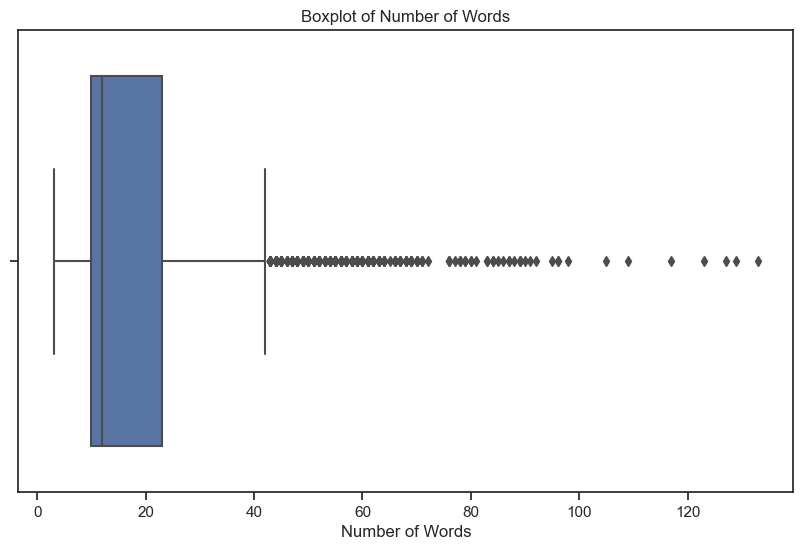

In [89]:
sns.set(style="ticks")
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['num_words'])
plt.title('Boxplot of Number of Words')
plt.xlabel('Number of Words')

plt.savefig(f'../img/image_3.png', bbox_inches='tight')
plt.show()


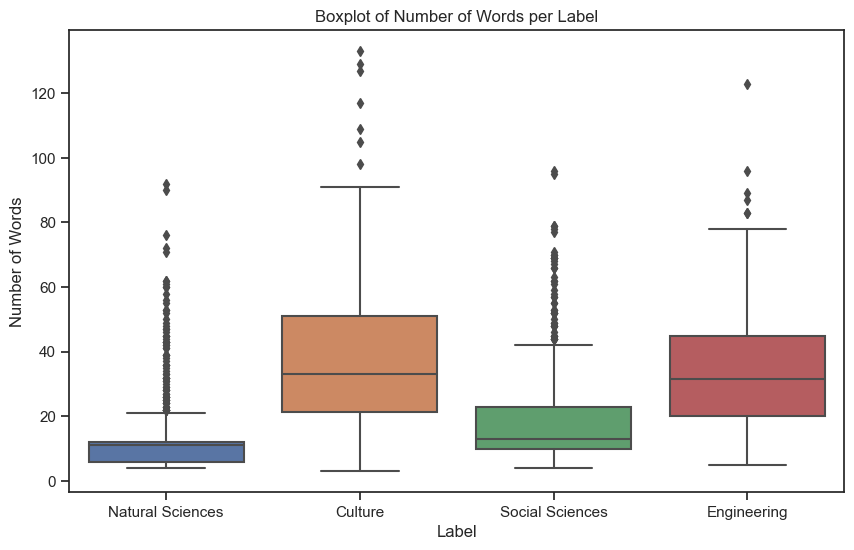

In [90]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='num_words', data=df)
plt.title('Boxplot of Number of Words per Label')
plt.xlabel('Label')
plt.ylabel('Number of Words')
plt.xticks(rotation=0)

plt.savefig(f'../img/image_4.png', bbox_inches='tight')
plt.show()


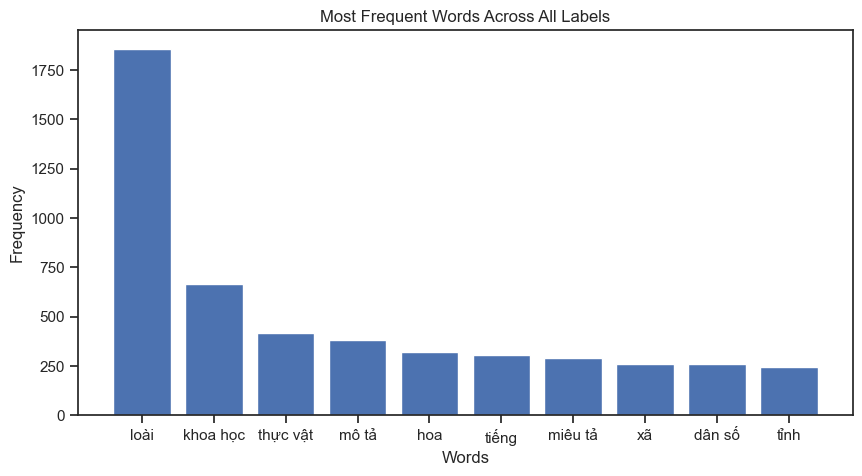

In [91]:
tokenized_words = df['tokenized_words'].explode().dropna()
labels = df['label']

# Create a counter for each label
label_word_counts = {}

# Calculate the frequency of each word for each label
for label in labels.unique():
    label_words = tokenized_words[labels == label]
    word_counts = Counter(label_words)
    label_word_counts[label] = word_counts

# Combine all the counters from each label
combined_counter = Counter()
for counter in label_word_counts.values():
    combined_counter += counter

# Get the most common words across all labels
most_common_words = combined_counter.most_common(10)

# Separate the words and their counts for plotting
words, counts = zip(*most_common_words)

# Create the bar plot
plt.figure(figsize=(10, 5))
plt.bar(words, counts)
plt.title('Most Frequent Words Across All Labels')
plt.xlabel('Words')
plt.ylabel('Frequency')

plt.savefig(f'../img/image_5.png', bbox_inches='tight')
plt.show()



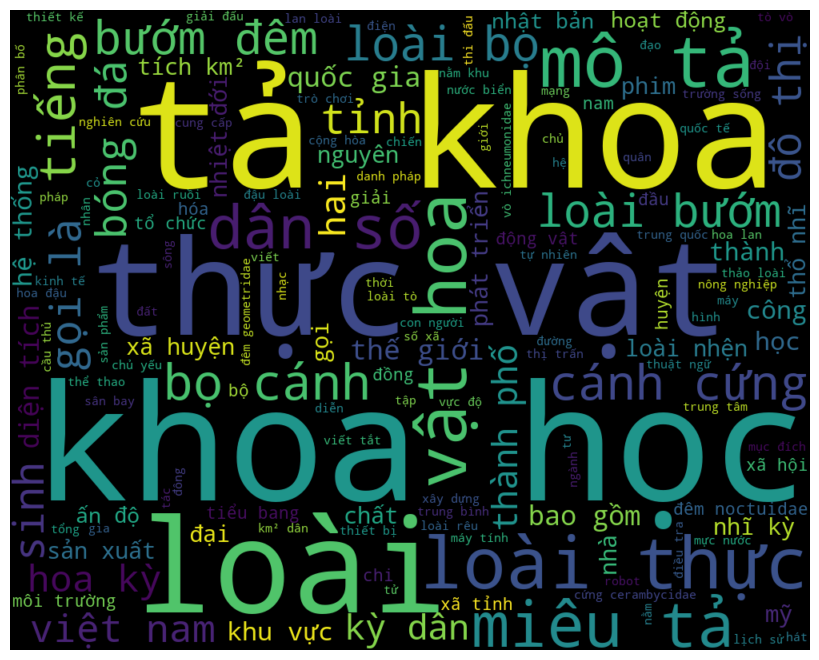

In [95]:

# Get the list of all content
contents = df['content'].values

# Convert the list of contents into a single string
text = ' '.join(contents)

# Create a WordCloud object
wordcloud = WordCloud(width = 1000, height = 800, stopwords = None, min_font_size = 15).generate(text)

# Plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.savefig(f'../img/image_6.png', bbox_inches='tight')
plt.show()


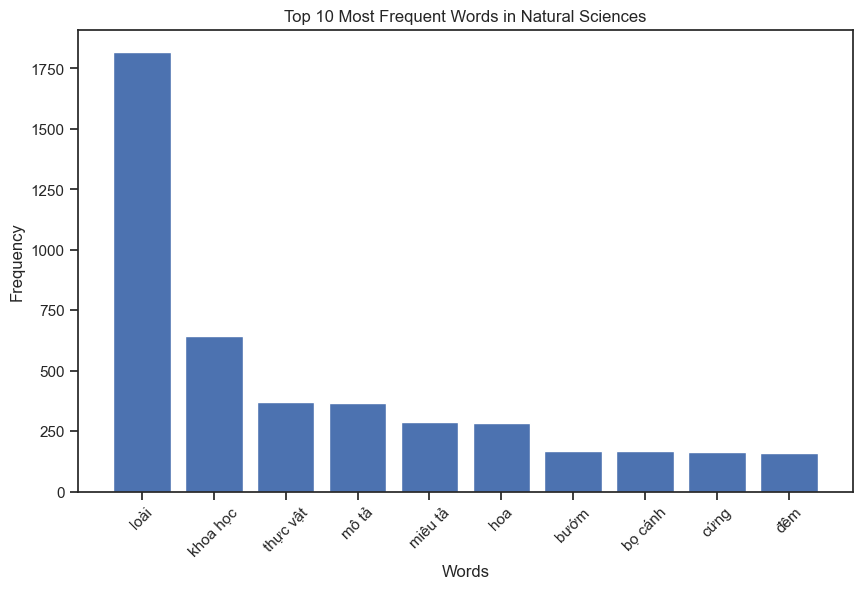

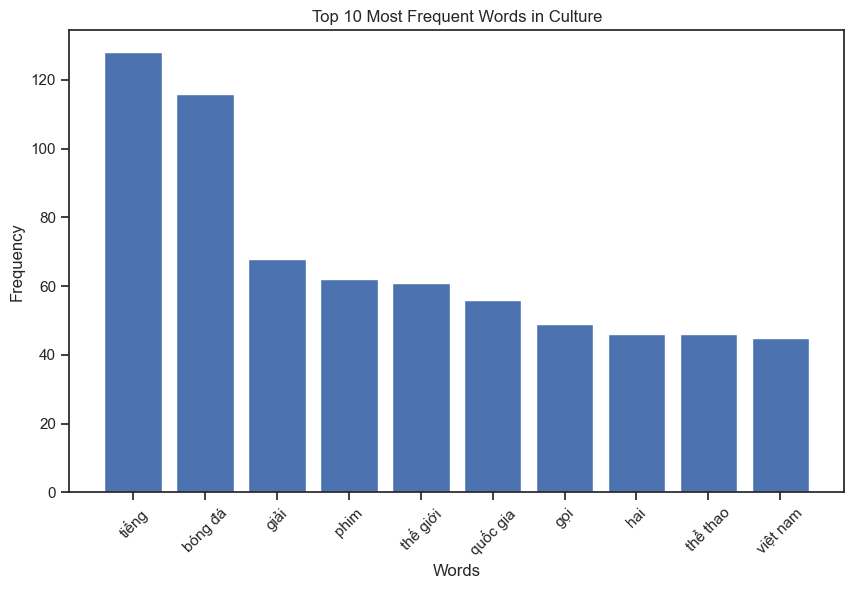

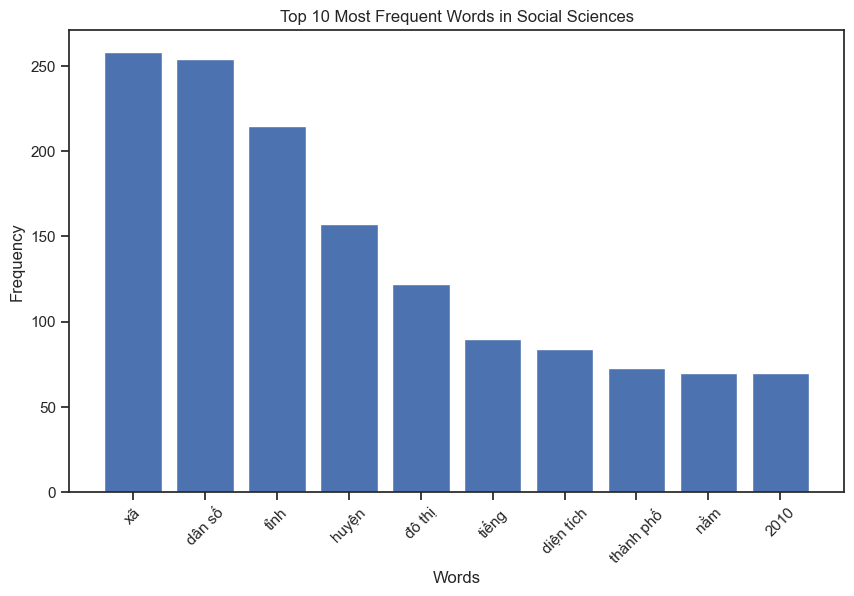

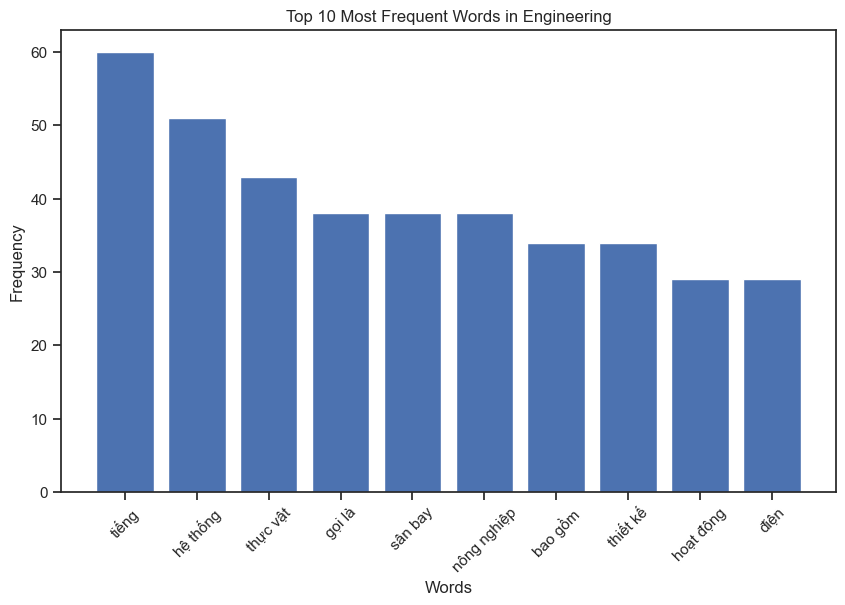

In [98]:
# Draw the chart for each label and save to different image files
for i, (label, word_counts) in enumerate(label_word_counts.items(), start=1):
    # Get the list of words and corresponding frequencies
    words = list(word_counts.keys())
    counts = list(word_counts.values())

    # Sort by frequency in descending order and take the top 10
    sorted_indices = sorted(range(len(counts)), key=lambda i: counts[i], reverse=True)[:10]
    top_words = [words[i] for i in sorted_indices]
    top_counts = [counts[i] for i in sorted_indices]

    # Draw the frequency chart for the top 10 words of each label
    plt.figure(figsize=(10, 6))
    plt.bar(top_words, top_counts)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title(f'Top 10 Most Frequent Words in {label}')
    plt.xticks(rotation=45)

    plt.savefig(f'../img/image_{i+6}.png', bbox_inches='tight')
    plt.show()


## Error analysis on BiGRU

In [2]:
import torch
import torch.nn as nn
from torchvision import transforms

from data.w2v_loader import W2VLoader
from data.wiki_dataset import WikiDataset
from utils.preprocess import custom_transform

w2v_loader = W2VLoader('../data/wiki.vi.model.bin.gz')
w2v_model = w2v_loader.get_model()
VOCAB_SIZE  = w2v_loader.vocab_size
EMBEDDING_DIM = w2v_loader.embedding_dim


# Modify BiGRU to output the representation of the last hidden state as well
class BiGRU(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes, embed_model, num_layers, dropout_prob=0.5):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        vocab_size, embed_dim = embed_model.vectors.shape
        self.embedding_layer = nn.Embedding(num_embeddings=vocab_size, embedding_dim=embed_dim)
        self.embedding_layer.weight = nn.Parameter(torch.from_numpy(embed_model.vectors))  # all vectors
        
        
        self.embedding_layer.weight.requires_grad = False  # Freeze the embedding layer
        
        self.bi_gru = nn.GRU(input_size, hidden_size, num_layers=num_layers, batch_first=True, bidirectional=True)
        self.dropout = nn.Dropout(dropout_prob)  # Dropout layer
        self.fc = nn.Linear(hidden_size * 2, num_classes)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        batch_size = x.size(0)
        x = self.embedding_layer(x)  # (batch_size, seq_length, embedding_dim)
        h0 = torch.zeros(self.num_layers*2, batch_size, self.hidden_size, device=x.device)  # (num_layers*2, batch_size, hidden_size)
        out, _ = self.bi_gru(x, h0) # (batch_size, T_x, hidden_size*2)
        out = self.dropout(out)  # Apply dropout
        # Max pooling over time
        out_maxpool = torch.max(out, 1).values # (batch_size, hidden_size*2)
        out = self.fc(out_maxpool) # (batch_size, num_classes)
        out = self.softmax(out) # (batch_size, num_classes)
        return out, out_maxpool




In [5]:
transform = transforms.Compose([
    custom_transform,
])


val_dataset = WikiDataset(data_path="../data/test_wiki_data.csv", transform=transform)
val_loader = val_dataset.get_data_loader()

model = BiGRU(input_size=EMBEDDING_DIM, 
                   hidden_size=256, 
                   num_classes=4,
                   embed_model=w2v_model,
                   num_layers=1,
                   dropout_prob=0.5)
model.load_state_dict(torch.load('../saved_models/bigru.pth', map_location=torch.device('cpu')))

label_dict = {
    '0': [],
    '1': [],
    '2': [],
    '3': [],
}

for i in range(len(val_dataset)):
    row = val_dataset.data_frame.iloc[i]
    title = row.title
    content = row.content
    label = row.label
    
    processed_content = custom_transform(content, w2v_model).unsqueeze(0)
    y_pred, out_maxpool = model(processed_content)
    
    # Squeeze, detach the tensor and convert it to a numpy array
    out_maxpool = out_maxpool.squeeze().detach().numpy()
    
    label_dict[str(label)].append(out_maxpool)


c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


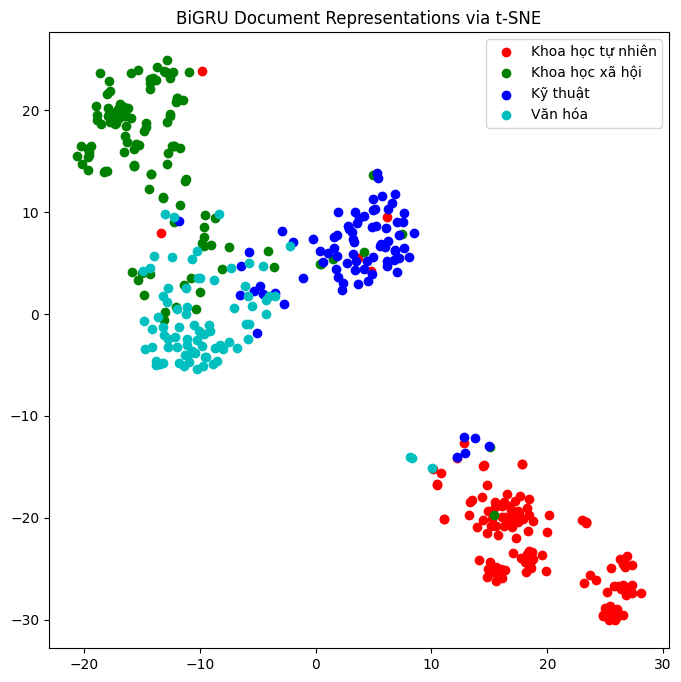

In [12]:
from sklearn.manifold import TSNE
import numpy as np

colors = ['r', 'g', 'b', 'c']
labels_name = ['Khoa học tự nhiên', 'Khoa học xã hội', 'Kỹ thuật', 'Văn hóa']

data = []
labels = []
for i, (label, values) in enumerate(label_dict.items()):
    data.extend(values)
    labels.extend([colors[i]] * len(values))

data = np.array(data)
labels = np.array(labels)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=0)
transformed_data = tsne.fit_transform(data)

fig = plt.figure(figsize=(8, 8))
for i, color in enumerate(colors):
    plt.scatter(transformed_data[labels == color, 0], transformed_data[labels == color, 1], c=color, label=labels_name[i])

plt.title('BiGRU Document Representations via t-SNE')
plt.legend()
plt.show()
fig.savefig('../img/image_9.png', bbox_inches='tight')